In [76]:
from qiskit import *
import numpy as nm
import math
import matplotlib.pyplot as plt
import networkx as nx

In [77]:
v=nm.arange(0,8,1)
e=[(0,1,1),(1,3,4),(1,3,1),(0,5,2),(2,4,7),(3,4,6),(4,5,3),(4,6,4),(2,6,3),(3,6,1),(4,7,5),(6,7,1),(1,7,2)]

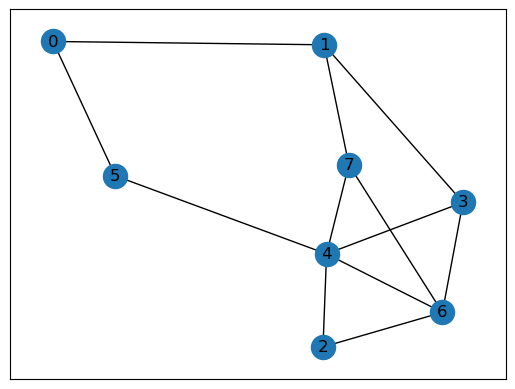

In [78]:

g=nx.Graph()
g.add_nodes_from(v)
g.add_weighted_edges_from(e)
nx.draw_networkx(g)

In [79]:
step=0.05
g=b=nm.arange(0,math.pi,step)
g,b=nm.meshgrid(g,b)

In [80]:
k=3-((nm.sin(2*b)**2)*(nm.sin(2*g)**2)-(0.5*nm.sin(4*b))*(nm.sin(4*g)))*(1+nm.cos(4*g)**2)
res=nm.where(k==nm.amax(k))
a=list(zip(res[0],res[1]))[0]
gam=a[0]*step;
bet=a[1]*step;

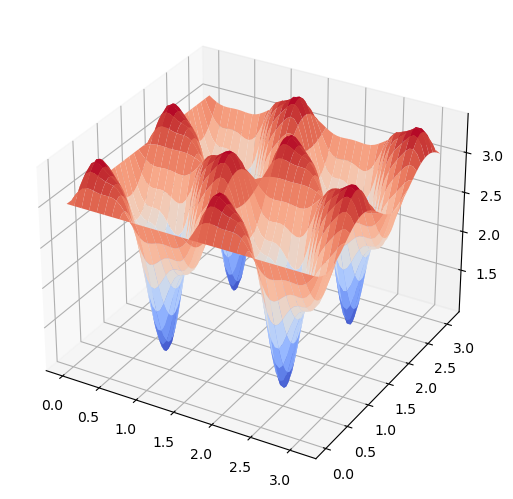

In [81]:
from   matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
# ax  = fig.gca(projection='3d')
ax = fig.add_axes(Axes3D(fig))
surf = ax.plot_surface(g,b,k,cmap=cm.coolwarm,linewidth=0,antialiased=True)
plt.show()

In [82]:
pi=math.pi

In [83]:
q=QuantumRegister(len(v))
c=ClassicalRegister(len(v))
qc=QuantumCircuit(q,c)

In [84]:
for i in range(len(v)):
  qc.u(pi/2,0,pi,q[i])

qc.barrier()

In [85]:
for i in e:
    k = i[0]
    l = i[1]
    qc.u(0,0,-gam,q[l])
    qc.cx(q[l],q[k])
    qc.u(0,0,gam,q[k])
    qc.cx(q[l],q[k])
    qc.u(0,0,-gam,q[k])
    qc.u(0,0,gam, k)
    qc.u(0,0,gam, l)

In [86]:
qc.barrier()
for i in range(len(v)):
  qc.u(2*bet,3*pi/2,pi/2,q[i])
qc.barrier()

In [87]:
for i in range(len(v)):
  qc.measure(q[i],c[i])

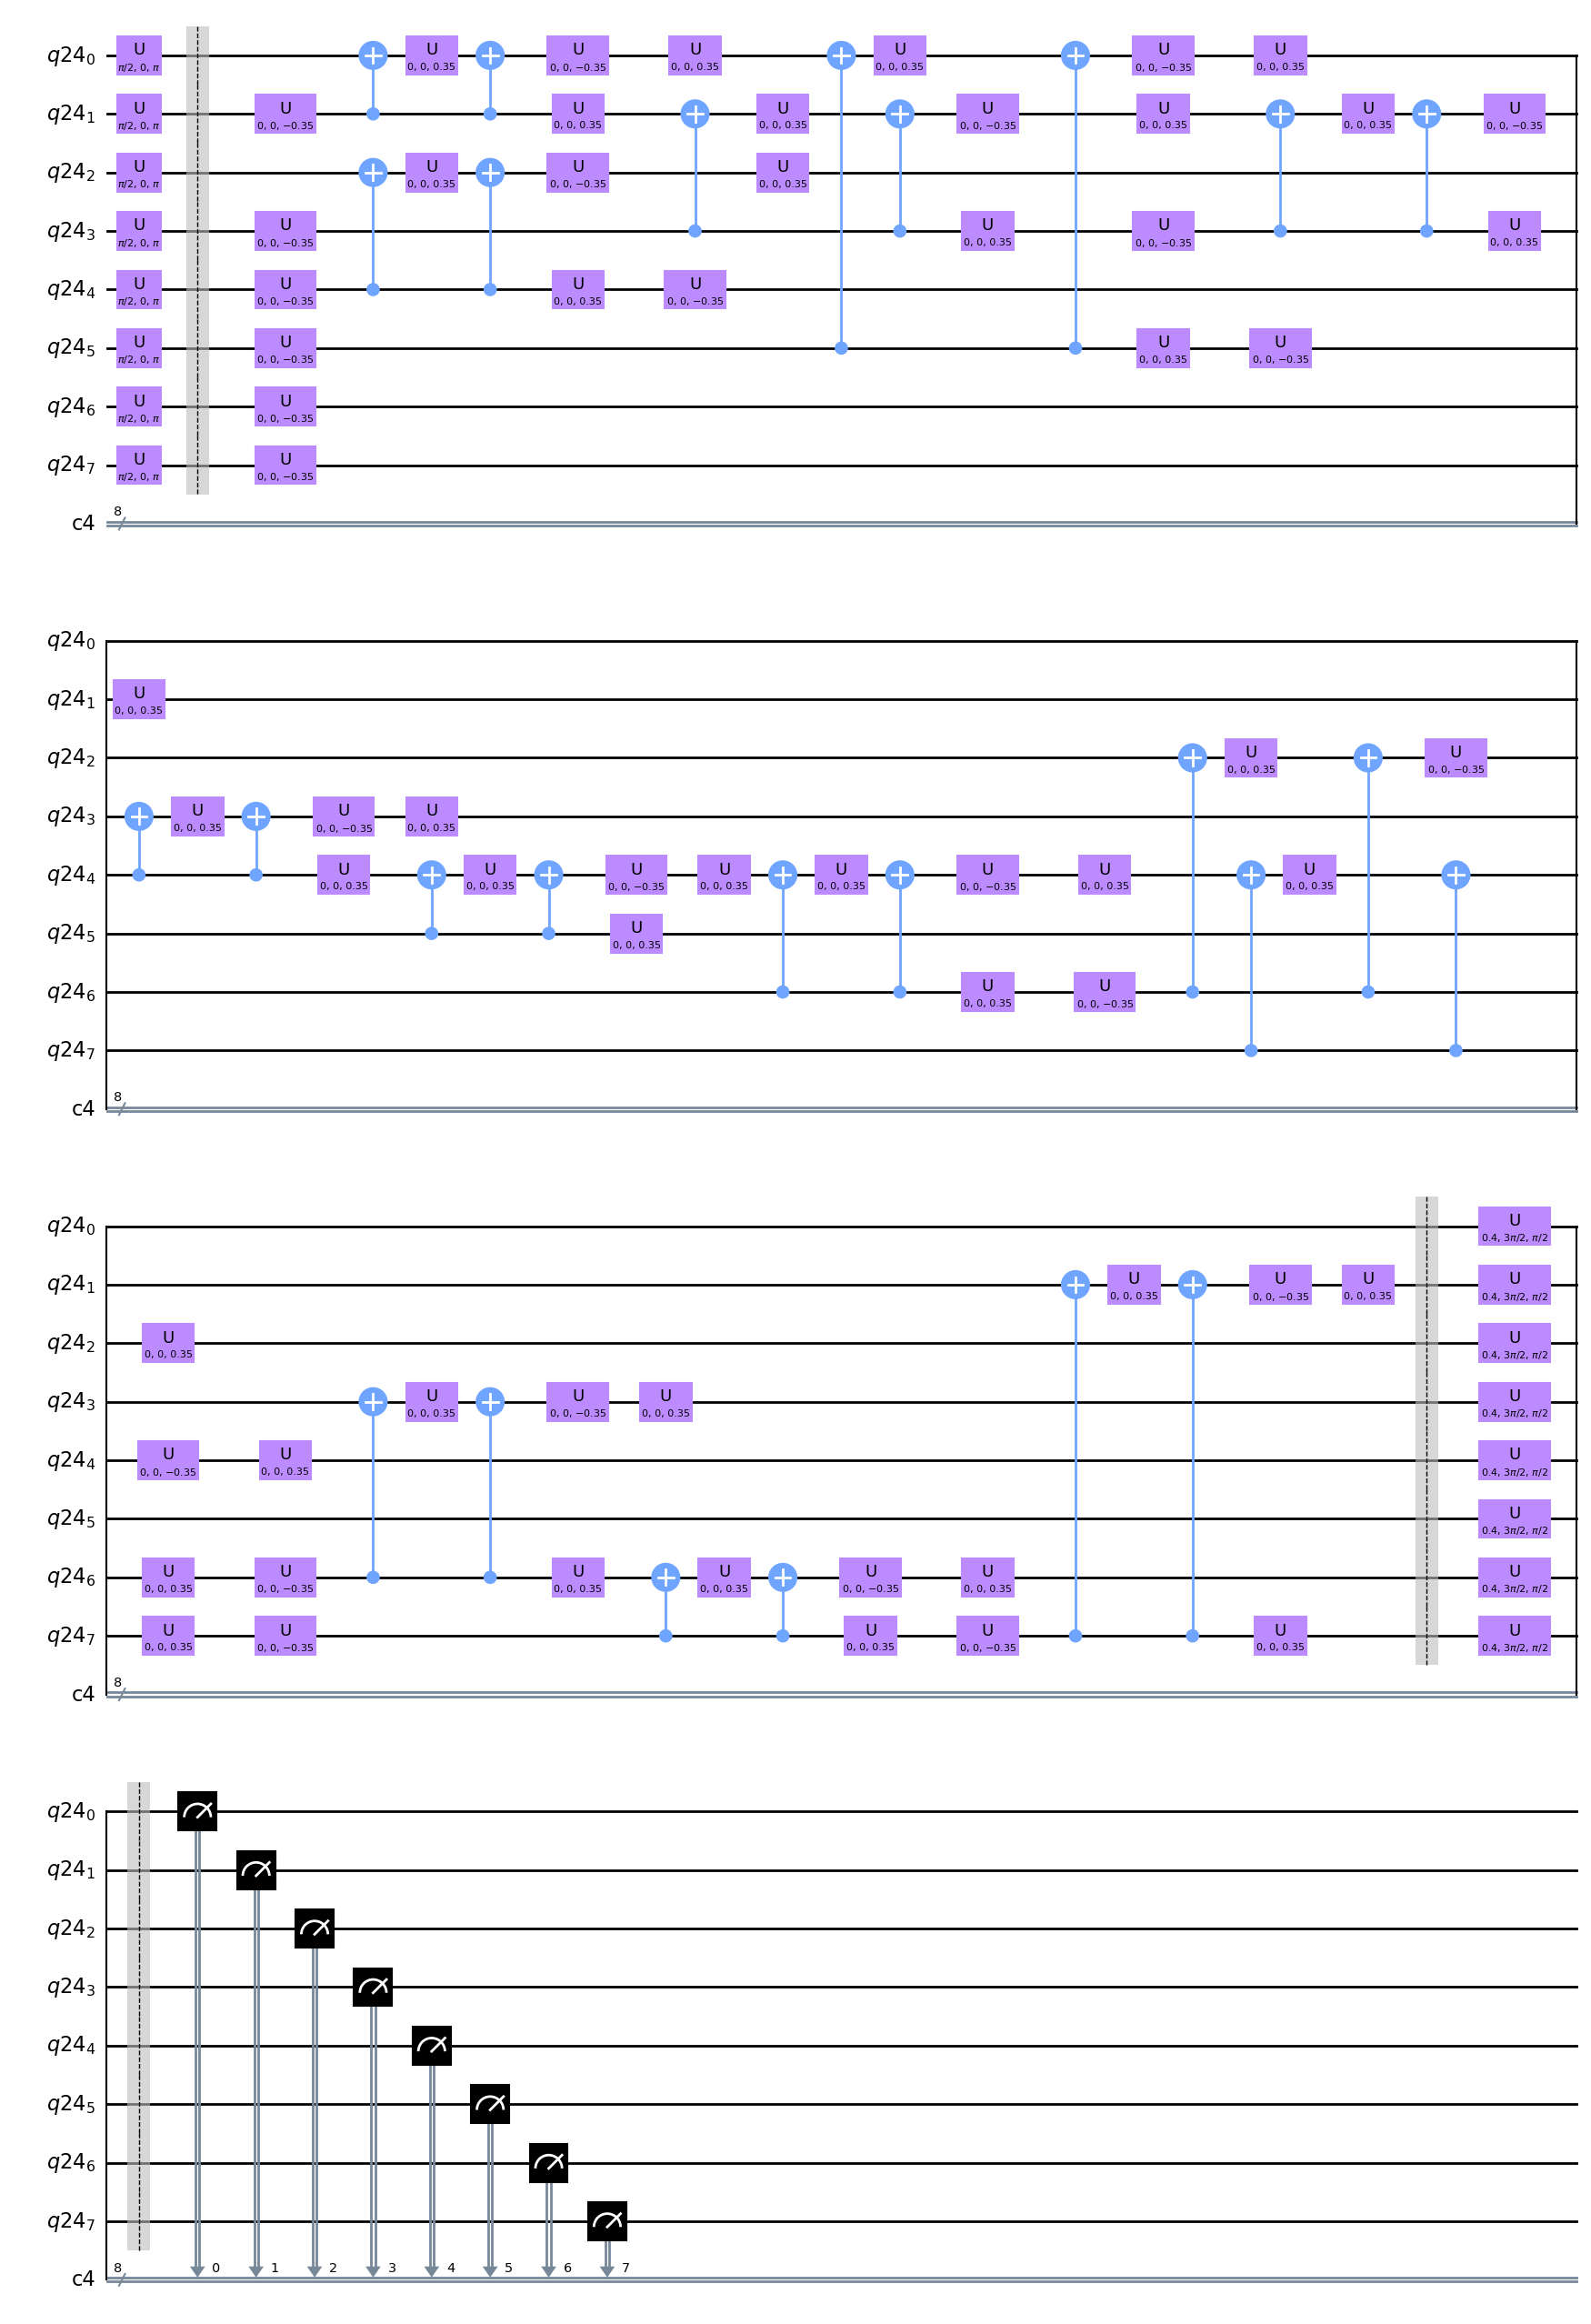

In [88]:
qc.draw(output="mpl")

In [89]:
sim = Aer.get_backend('qasm_simulator')
res=execute(qc, backend=sim).result() 

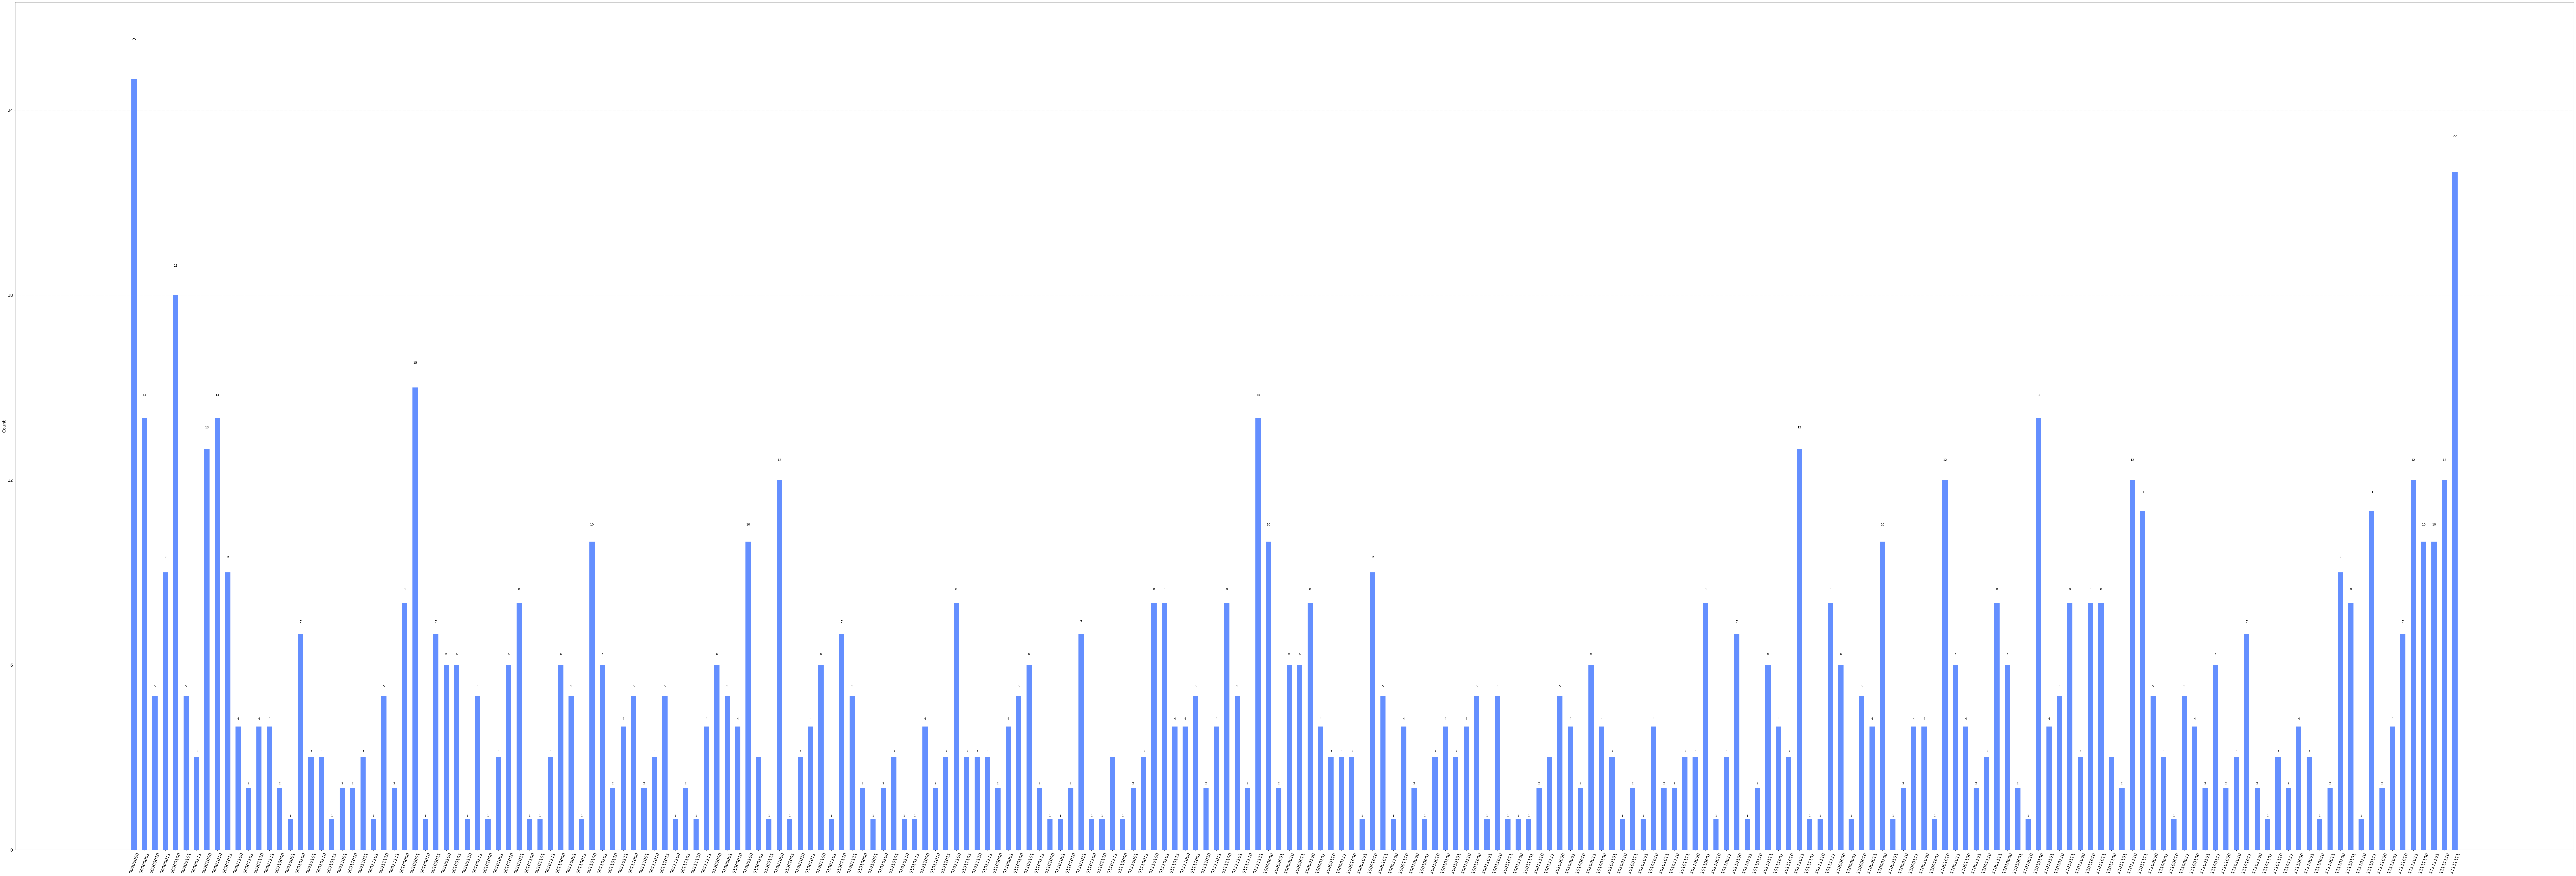

In [90]:
from qiskit.visualization import plot_histogram as ph
ph(res.get_counts(qc),figsize=(150,50))